### Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Reading the dataset

In [2]:
os.chdir('D:/PAULAMI/GIM/GIM Documents/Documents/Certificates/Coursera Courses/IBM Machine Learning Professional Certificate/Courses/2. Supervised Machine Learning-Regression/Week 3/Final Project')

In [3]:
df=pd.read_csv('used_cars.csv')

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Describing the dataset

In [5]:
df.shape

(6019, 13)

In [6]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

####  Mileage, Engine, Power, New Price - can be put as a range??

In [7]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [9]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### We have 5195 null values in the column New_Price. Hence, we drop this column.

In [10]:
df = df.drop(columns="New_Price", axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#### Adding the age of car as an attibute

In [11]:
df['Current_year'] = 2022
df['Age'] = df['Current_year']-df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Current_year,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2022,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,2022,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,2022,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,2022,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,2022,9


#### Dropping columns 'Year' & 'Current_year' as it is of no use

In [12]:
df=df.drop(['Current_year', 'Year'], axis=1)
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,7
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,11
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,9


#### Removing 'kmpl' & 'km/kg' from Mileage column and changing it into a float type

In [13]:
df['Mileage'] = df['Mileage'].str.rstrip(' kmpl')

In [14]:
df['Mileage'] = df['Mileage'].str.rstrip(' km/kg')

In [15]:
df['Mileage'] = df['Mileage'].astype(float)

In [16]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,7
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,11
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,9


#### Removing 'CC' from the values in column 'Engine' & changing it into a float

In [17]:
df['Engine'] = df['Engine'].str.rstrip(' CC')

In [18]:
df['Engine'] = df['Engine'].astype(float)

In [19]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,7
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,11
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,9


In [20]:
df.isna().sum()

Name                  0
Location              0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Age                   0
dtype: int64

#### Removing 'bhp' from the values in column 'Power' and changing it into a float type

In [21]:
df['Power'] = df['Power'].str.rstrip(' bhp')

In [22]:
df['Power'] = df['Power'].replace(regex='null', value=np.nan)

In [23]:
df['Power'] = df['Power'].astype(float)

#### Creating new columns Company and Model

In [24]:
df['Company'] = df['Name'].str.split(' ').str[0]

In [25]:
df['Model'] = df['Name'].str.split(' ').str[1]+df['Name'].str.split(' ').str[2]

In [26]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Company,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New


In [27]:
df.dtypes

Name                  object
Location              object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Age                    int64
Company               object
Model                 object
dtype: object

#### Removing the null values from the rows

In [28]:
df = df.dropna(axis=0)

In [29]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Company,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New


In [30]:
df = df.drop(columns="Name", axis=1)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Company,Model
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4New


In [31]:
df.count()

Location             5872
Kilometers_Driven    5872
Fuel_Type            5872
Transmission         5872
Owner_Type           5872
Mileage              5872
Engine               5872
Power                5872
Seats                5872
Price                5872
Age                  5872
Company              5872
Model                5872
dtype: int64

#### Correlations between the features

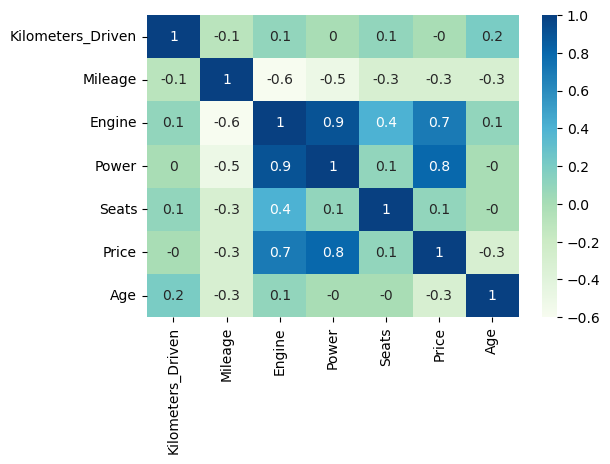

In [32]:
# Studying the corellations between features using Heat Map!
plt.figure(dpi=100)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="GnBu")
plt.show()

In [33]:
df.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age
Kilometers_Driven,1.000000,-0.060608,0.093030,0.033490,0.083072,-0.008249,0.169369
Mileage,-0.060608,1.000000,-0.637258,-0.538844,-0.331576,-0.341652,-0.285623
Engine,0.093030,-0.637258,1.000000,0.866301,0.401116,0.658047,0.068045
Power,0.033490,-0.538844,0.866301,1.000000,0.101460,0.772843,-0.014531
Seats,0.083072,-0.331576,0.401116,0.101460,1.000000,0.055547,-0.007833
Price,-0.008249,-0.341652,0.658047,0.772843,0.055547,1.000000,-0.299475
Age,0.169369,-0.285623,0.068045,-0.014531,-0.007833,-0.299475,1.000000


#### Testing normality of the Target variable Price

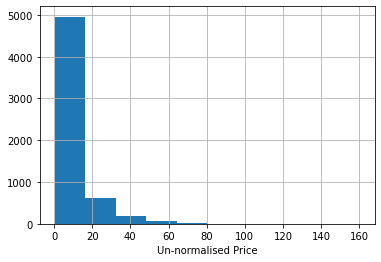

In [34]:
df['Price'].hist()
plt.xlabel('Un-normalised Price')
plt.show()

As we can see the Price variable is right-skewed. So we transform the variable to make it normally distributed.

Text(0.5, 0, 'Normalised Price')

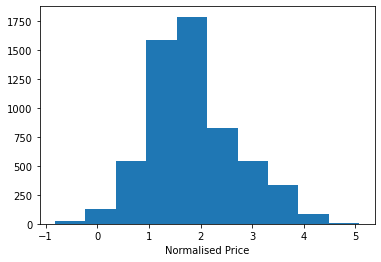

In [35]:
# applying log transform on chareges feature: 
log_charges = np.log(df.Price)
plt.hist(log_charges)
plt.xlabel('Normalised Price')


In [36]:
df['Price'] = np.log(df['Price'])

In [37]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Company,Model
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616,12,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,7,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077,11,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759,10,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822,9,Audi,A4New


#### ONE HOT ENCODING - for the columns Location, Fuel_Type, Transmission, Owner_Type,  and newly created features Company & Model

In [38]:
dummies = pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type','Company','Model']])
dummies.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df = pd.concat([df, dummies], axis=1)
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616,...,0,0,0,0,0,0,0,0,0,0
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077,...,0,0,0,0,0,0,0,0,0,0
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759,...,0,0,0,0,0,0,0,0,0,0
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df = df.drop(columns=['Location','Fuel_Type','Transmission','Owner_Type','Company','Model'], axis=1)
df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
0,72000,26.60,998.0,58.16,5.0,0.559616,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582.0,126.20,5.0,2.525729,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199.0,88.70,5.0,1.504077,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248.0,88.76,7.0,1.791759,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968.0,140.80,5.0,2.875822,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

y_col = 'Price'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df.columns if x != y_col]
X_data = df[feature_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)


### Modelling the dataset

#### Simple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()

LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
r2_score(y_test_pred, y_test)

0.9317216234485184

#### Linear Regression with Polynomial effects

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression()

X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, y_data)
Y_pred = lr.predict(X_poly)
r2_score(y_test_pred, y_test)

0.9317216234485184

#### Regularization Regression

In [44]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, y_data)
Y_pred_lr = lassor.predict(X_poly)

In [45]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()

,linear regression,ridge regression,lasso regression
count,7.180000e+02,718.000000,718.000000
mean,4.462797e+04,0.270067,0.073435
std,1.195808e+06,0.240036,0.162940
min,8.280119e-08,0.000000,0.000000
25%,1.624229e-01,0.105649,0.000000
50%,3.365072e-01,0.225777,0.000000
75%,7.141836e-01,0.369650,0.101765
max,3.204231e+07,3.174738,2.767690


In [46]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

##### Ridge Regression

In [47]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test))
print(ridgeCV.alpha_, ridgeCV_R2, ridgeCV_rmse)

0.3 0.9389624856809948 0.2120197805774384


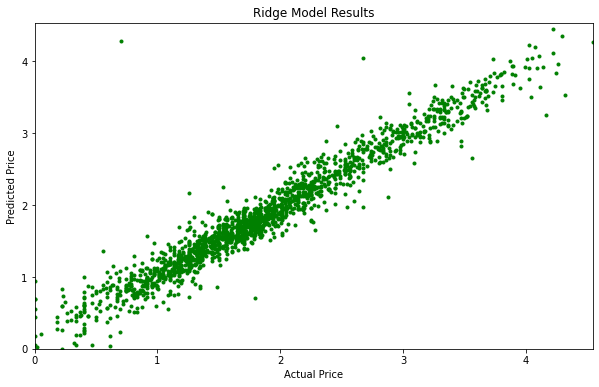

In [48]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), marker='o', ls='', color='g', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=lim, ylim=lim, title='Ridge Model Results')
plt.show()

##### Lasso Regression

In [49]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 
print(lassoCV.alpha_, lassoCV_R2, lassoCV_rmse)  # Lasso is slower

5e-05 0.9371219292141676 0.21519271518008526


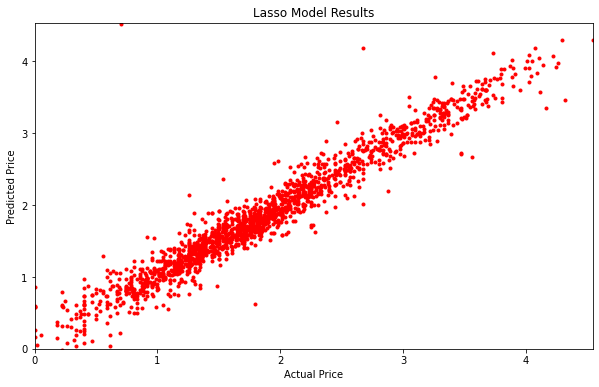

In [50]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), marker='o', ls='', color='r', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=lim, ylim=lim, title='Lasso Model Results')
plt.show()

##### Elastic Net Regression

In [51]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0001 0.1 0.21200577793109082


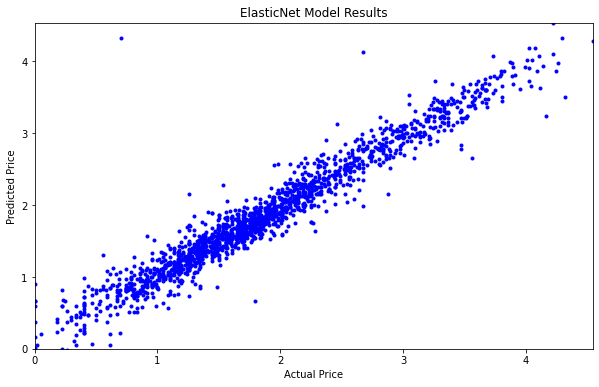

In [52]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), marker='o', ls='', color='b', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', ylabel='Predicted Price', xlim=lim, ylim=lim, title='ElasticNet Model Results')
plt.show()

##### Simple Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 

print(linearRegression_rmse, linearRegression_R2)

0.21618910540285352 0.9365383022157341


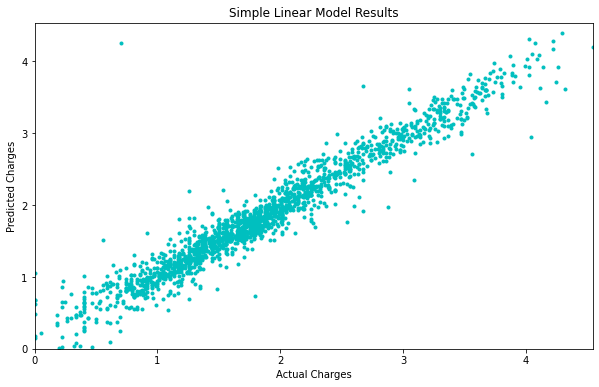

In [54]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), marker='o', ls='', color='c', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', ylabel='Predicted Charges', xlim=lim, ylim=lim, title='Simple Linear Model Results');

In [55]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,0.216189,0.936538
Lasso,0.215193,0.937122
Ridge,0.212020,0.938962
ElasticNet,0.212006,0.938971


In [56]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l1',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'none',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
new_R2 = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    new_R2[modellabel] = r2_score(y_test, SGD.predict(X_test))
    
metric_df['RMSE-SGD'] = pd.Series(new_rmses)
metric_df['R2-SGD'] = pd.Series(new_R2)
metric_df

,RMSE,R2,RMSE-SGD,R2-SGD
Linear,0.216189,0.936538,9.585133e+16,-1.247499e+34
Lasso,0.215193,0.937122,2.031819e+19,-5.605498e+38
Ridge,0.212020,0.938962,8.748683e+17,-1.039272e+36
ElasticNet,0.212006,0.938971,1.856228e+18,-4.678501e+36
